## XOR: Neural Network Approach
#### Author: lucasnseq@gmail.com

Exclusive or or exclusive disjunction is a logical operation that is true if and only if its arguments differ (one is true, the other is false).

XOR truth table

|   | 0 | 1 |
|---|---|---|
| 0 | 0 | 1 |
| 1 | 1 | 0 |


### Import Dependencies

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from tqdm.auto import tqdm

In [2]:
from tensorflow.keras import Input
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras import Sequential

from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import optimizers

### Dataset

In [3]:
# Create dataset for XOR
df = pd.DataFrame({'x1': [1, 1, 0, 0], 'x2': [1, 0, 1, 0], 'y': [0, 1, 1, 0]})
df

,x1,x2,y
0,1,1,0
1,1,0,1
2,0,1,1
3,0,0,0


In [4]:
# Augmentate data so NN can be trained in less epochs
df = pd.concat([df]*250)
df_size = len(df)
df.shape

(1000, 3)

In [5]:
# Prepare tf Dataset
BATCH_SIZE = 1

dataset = tf.data.Dataset.from_tensor_slices((tf.cast(df[['x1', 'x2']].values, tf.float64), tf.cast(df['y'].values.reshape(-1, 1), tf.float64)))
dataset = dataset.batch(BATCH_SIZE)

# Example data shape
dataset.take(1)

<TakeDataset shapes: ((None, 2), (None, 1)), types: (tf.float64, tf.float64)>

In [6]:
# Train Dataset
train_ds = dataset.take(df_size)

### Model

#### Single Layer

In [7]:
def get_model_single(lr=0.03):
  '''Return single percepton model'''

  # Model layers
  model_layers = [
            layers.InputLayer(input_shape=(2,), name="InputLayer"),
            layers.Dense(1, activation='sigmoid', name="OutputLayer_1Unit_Sigmoid")
  ]

  # Build model
  model = Sequential(model_layers, name="XORSingleLayer")

  # hparams
  hparams = {
      'optimizer': optimizers.Adam(learning_rate=lr),
      'loss': losses.MeanAbsoluteError(),
      'metrics': [metrics.BinaryAccuracy()]
  }

  # Compile model
  model.compile(optimizer=hparams['optimizer'], 
                loss=hparams['loss'],
                metrics=hparams['metrics'])
  
  return model

# Load model
model = get_model_single()

# View model
model.summary()

Model: "XORSingleLayer"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
OutputLayer_1Unit_Sigmoid (D (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


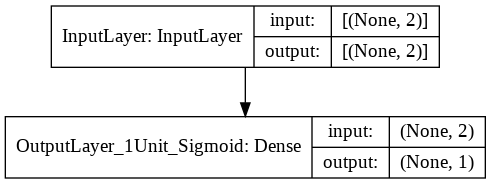

In [8]:
tf.keras.utils.plot_model(model, show_shapes=True)

#### Multiple Layers

In [9]:
def get_model_multiple(lr=0.001):
  '''Return multiple layers NN model'''

  # Model layers
  model_layers = [
            layers.InputLayer(input_shape=(2,), name="InputLayer"),
            layers.Dense(2, activation='swish', name="HiddenLayer1_2Unit_Swish"),
            layers.Dense(2, activation='swish', name="HiddenLayer2_2Unit_Swish"),
            layers.Dense(1, activation='sigmoid', name="OutputLayer_1Unit_Sigmoid")
  ]

  # Build model
  model = Sequential(model_layers, name="XORMultipleLayer")

  # hparams
  hparams = {
      'optimizer': optimizers.Adam(learning_rate=lr),
      'loss': losses.MeanAbsoluteError(),
      'metrics': [metrics.BinaryAccuracy()]
  }
  
  # hparams
  hparams = {
      'optimizer': optimizers.Adam(learning_rate=lr),
      'loss': losses.MeanAbsoluteError(),
      'metrics': [metrics.BinaryAccuracy()]
  }

  # Compile model
  model.compile(optimizer=hparams['optimizer'], 
                         loss=hparams['loss'],
                         metrics=hparams['metrics'])
  
  return model

# Load model
model = get_model_multiple()

# View model
model.summary()

Model: "XORMultipleLayer"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
HiddenLayer1_2Unit_Swish (De (None, 2)                 6         
_________________________________________________________________
HiddenLayer2_2Unit_Swish (De (None, 2)                 6         
_________________________________________________________________
OutputLayer_1Unit_Sigmoid (D (None, 1)                 3         
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


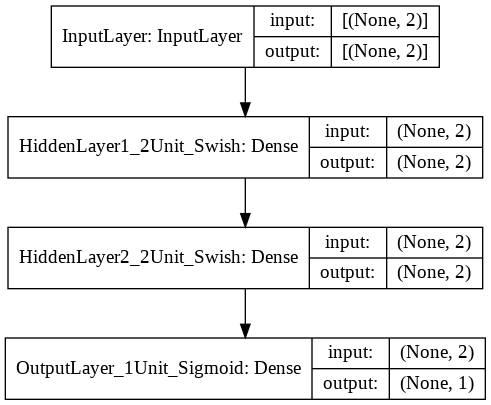

In [10]:
tf.keras.utils.plot_model(model, show_shapes=True)

### Train

#### Single Layer

In [11]:
# Perform train form single layer model
num_epochs = 20

model = get_model_single(lr=0.02)

# Perform training
single_layer_history = model.fit(
    train_ds,
    epochs=num_epochs,
)

Epoch 1/20
1000/1000 [==============================] - 1s 929us/step - loss: 0.4337 - binary_accuracy: 0.6390
Epoch 2/20
1000/1000 [==============================] - 1s 934us/step - loss: 0.2976 - binary_accuracy: 0.7500
Epoch 3/20
1000/1000 [==============================] - 1s 1ms/step - loss: 0.2654 - binary_accuracy: 0.7500
Epoch 4/20
1000/1000 [==============================] - 1s 979us/step - loss: 0.2569 - binary_accuracy: 0.7500
Epoch 5/20
1000/1000 [==============================] - 1s 953us/step - loss: 0.2536 - binary_accuracy: 0.7500
Epoch 6/20
1000/1000 [==============================] - 1s 922us/step - loss: 0.2520 - binary_accuracy: 0.7500
Epoch 7/20
1000/1000 [==============================] - 1s 916us/step - loss: 0.2512 - binary_accuracy: 0.7500
Epoch 8/20
1000/1000 [==============================] - 1s 906us/step - loss: 0.2507 - binary_accuracy: 0.7500
Epoch 9/20
1000/1000 [==============================] - 1s 950us/step - loss: 0.2504 - binary_accuracy: 0.7500
Epo

#### Multiple Layers

In [12]:
# Perform train form single layer model
num_epochs = 20

model = get_model_multiple(lr=0.003)

# Perform training
multiple_layer_history = model.fit(
    train_ds,
    epochs=num_epochs,
)

Epoch 1/20
1000/1000 [==============================] - 2s 1ms/step - loss: 0.4694 - binary_accuracy: 0.4610
Epoch 2/20
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3081 - binary_accuracy: 0.5880
Epoch 3/20
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1995 - binary_accuracy: 0.8640
Epoch 4/20
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0266 - binary_accuracy: 1.0000
Epoch 5/20
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0027 - binary_accuracy: 1.0000
Epoch 6/20
1000/1000 [==============================] - 1s 1ms/step - loss: 8.6077e-04 - binary_accuracy: 1.0000
Epoch 7/20
1000/1000 [==============================] - 1s 1ms/step - loss: 3.6582e-04 - binary_accuracy: 1.0000
Epoch 8/20
1000/1000 [==============================] - 1s 1ms/step - loss: 1.7627e-04 - binary_accuracy: 1.0000
Epoch 9/20
1000/1000 [==============================] - 1s 1ms/step - loss: 9.0607e-05 - binary_accuracy: 1.0000
Epo

#### Visualize loss per epoch

In [13]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(y=single_layer_history.history['loss'], name='Single Layer Loss')
)
fig.add_trace(
    go.Scatter(y=multiple_layer_history.history['loss'], name='Multiple Layer Loss')
)

fig.update_layout(title="Model Losses", xaxis_title="epoch", yaxis_title="loss")
fig.show()

### Animate model prediction over epochs

In [14]:
def get_model(model='single', lr=0.01):
  '''Returns a specific model'''

  assert model in ['single', 'multiple'], '"model" must be "single" or "multiple".'

  if model == 'single':
    return get_model_single(lr=lr)

  elif model == 'multiple':
    return get_model_multiple(lr=lr)

In [15]:
def animate_train(model='single', size=5, n_epochs=2, lr=0.01, st=0, ed=1):
  '''Returns a animated image of prediction over epochs'''

  # result df
  df = pd.DataFrame()

  # get model
  model = get_model(model=model, lr=lr)

  # progress bar
  pbar = tqdm(range(n_epochs+1))

  for epoch in pbar:

    if epoch > 0:
      # train model for 1 epoch
      hist = model.fit(
          train_ds,
          epochs=1,
          verbose=0
      )

      loss = hist.history['loss'][0]
      pbar.set_postfix({'loss': loss})

    # linear space
    x1s = np.linspace(st, ed, num=size)
    x2s = np.linspace(st, ed, num=size)

    for x1 in x1s:
      
      # prediction batch
      batch = []
      for x2 in x2s:
        batch.append([x1, x2])
      
      # predict batch
      values = model.predict(batch).reshape(-1)

      # compile results
      df = pd.concat((df, pd.DataFrame({
          'x1': [x1]*size,
          'x2': x2s,
          'value': values,
          'epoch': [epoch]*size
      })))

  return px.scatter(df, x="x1", y="x2", color="value", size=[3]*len(df), animation_frame="epoch", range_color=[0,1])

In [16]:
animate_train(model="single", n_epochs=20, size=30, lr=0.005)

  0%|          | 0/21 [00:00<?, ?it/s]

In [17]:
animate_train(model="multiple", n_epochs=20, size=30, lr=0.001)

  0%|          | 0/21 [00:00<?, ?it/s]